<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase10_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 10 (Miércoles 23 de abril, 2025)
---

## Matrices definidas positivas

Una matriz simétrica $S$ $m\times m$ se dice **definida positiva**, y escribimos $S\succ 0$, si la forma cuadrática (polinomio de grado $2$)
$$
x^TSx>0\qquad\mbox{para todo }x\in\mathbb{R}^m\setminus\{0\}.
$$


### Ejemplo

Consideremos la matriz:

$$
S = \begin{bmatrix}
5 & 4 \\
4 & 5
\end{bmatrix}
$$

Entonces, la forma cuadrática asociada es
$$
F(x,y)= (x,y)S \binom xy=5x^2 + 8xy + 5y^2,
$$
y la elipse asociada al conjunto de nivel $1$ es  $(x,y)^T S (x,y) = 1$ es:
$$
5x^2 + 8xy + 5y^2 = 1
$$
Veamos la figura:

In [ ]:
using LinearAlgebra
using Plots

Valores propios de S: [1.0, 9.0]
Vectores propios de S: [-0.7071067811865475 0.7071067811865475; 0.7071067811865475 0.7071067811865475]


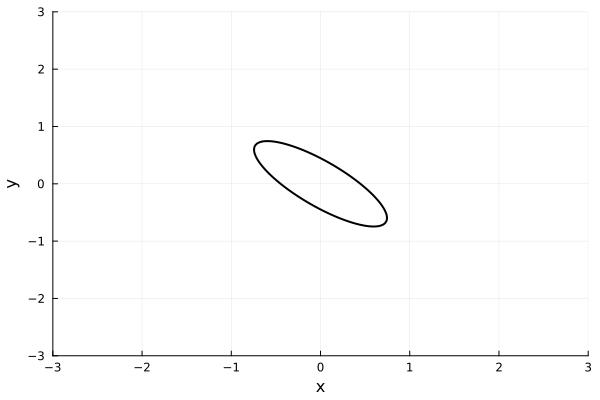

In [ ]:
# Definimos la matriz simétrica
S=[5 4; 4 5]
# Calculamos los valores propios
eigvals_S = eigvals(S)
println("Valores propios de S: ", eigvals_S)

eigvec_S=eigvecs(S)
println("Vectores propios de S: ", eigvec_S)

# Definimos la forma cuadrática q(x, y)
q(x, y) = [x, y]' * S * [x, y]

# Graficamos curvas de nivel
xs = ys = range(-3, 3, length=200)

Z = [q(x, y) for x in xs, y in ys]

# Graficamos curvas de nivel
xs = ys = range(-3, 3, length=200)

Z = [q(x, y) for x in xs, y in ys];
contour(xs, ys, Z,
    levels = [1],
    xlabel = "x", ylabel = "y",
    #title = L"q(x, y) = 2x^2 + 60y^2",
    fill = false,
    linewidth = 2,
    legend = false)


### Transformación a coordenadas principales

Los vectores propios de $S$ son:

- $q_1 = (1, 1)$
- $q_2 = (1, -1)$

Dividiendo por $\sqrt{2}$ obtenemos vectores unitarios:

- $\frac{1}{\sqrt{2}}(1, 1)$
- $\frac{1}{\sqrt{2}}(1, -1)$

Sea
$$
Q=\frac{1}{\sqrt{2}}(q_1,q_2)= \frac{1}{\sqrt{2}} \begin{pmatrix}1 & 1\\ 1 &-1
\end{pmatrix}
$$ la matriz ortogonal asociada.

De esta forma tenemos que $SQ=QD$,  donde $D$ es diagonal con $\lambda_1 = 9$ y $\lambda_2 = 1$. Es decir
$$S = Q D Q^T.$$

Luego tenemos:
$$
F(x,y)= (x,y)Q D Q^T\binom xy=
\left( Q^T\binom xy\right)^T D \left( Q^T\binom xy\right).
$$

Observando que
$$
Q^T\binom xy =\binom{\frac{x+y}{\sqrt{2}}}{\frac{x-y}{\sqrt{2}}}
$$
obtenemos:
$$
F(x,y)=5x^2 + 8xy + 5y^2=9\left(\frac{x+y}{\sqrt{2}}\right)^2 + \left(\frac{x-y}{\sqrt{2}}\right)^2
$$

Otra forma de verlo es realizar un cambio de variable tomando como base, en vez de la canónica, la formada por los vectores propios.

Es decir, si consideramos el cambio de variable
$$
\binom uv= Q^T\binom xy
$$
es decir:
$$
u=\frac{x+y}{\sqrt{2}}
v= \frac{x-y}{\sqrt{2}}
$$

Obtenemos que la forma cuadrática en estas nuevas variables es
$$F_{\text{new}}(u,v)= 9u^2+v^2.$$

En estas coordenadas, la ecuación de la elipse se transforma en:

$$
9u^2 + v^2 = 1
$$


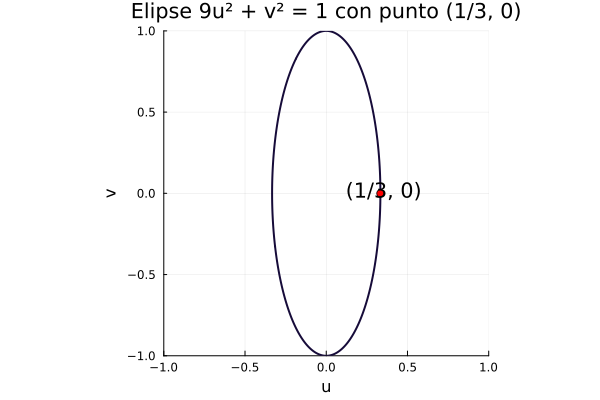

In [ ]:
using Plots

S = [9.0 0.0; 0.0 1.0]
q(u, v) = [u, v]' * S * [u, v]

xs = ys = range(-1, 1, length=500)

# ¡Importante! Generar Z con orden correcto
Z = [q(u, v) for v in ys, u in xs]

u0, v0 = 1/3, 0

contour(xs, ys, Z;
    levels = [1.0],
    xlabel = "u", ylabel = "v",
    fill = false,
    linewidth = 2,
    legend = false,
    aspect_ratio = :equal,
    xlims = (-1, 1), ylims = (-1, 1),
    title = "Elipse 9u² + v² = 1 con punto (1/3, 0)")

scatter!([u0], [v0], color=:red, marker=:circle, label="")
annotate!([(u0 + 0.02, v0 + 0.02, "(1/3, 0)")])



# Geometría de la elipse

La ecuación:

$$
x^T S x = 5x^2 + 8xy + 5y^2 = 9\left( \frac{x + y}{\sqrt{2}} \right)^2 + \left( \frac{x - y}{\sqrt{2}} \right)^2
$$

muestra que el cambio de base al sistema de coordenadas $(X, Y)$ hace aparecer la elipse como:

$$
9u^2 + v^2 = 1
$$

En este sistema, las **longitudes de los ejes** son:

- Longitud del eje corto: $1 / \sqrt{9} = 1/3$
- Longitud del eje largo: $1 / \sqrt{1} = 1$

Los ejes están **alineados con los vectoresk propios** de $S$.

---


## Formas cuadráticas y ejes principales

**Teorema (Ejes principales de una forma cuadrática positiva definida)**

Sea $S \in \mathbb{R}^{n \times n}$ una matriz simétrica definida positiva, con descomposición espectral

$$
S = Q \Lambda Q^T,
$$

donde $Q$ es una matriz ortogonal cuyas columnas son los autovectores de $S$, y $\Lambda = \operatorname{diag}(\lambda_1, \dots, \lambda_n)$ es la matriz diagonal de autovalores positivos $\lambda_i > 0$.

Entonces, la ecuación cuadrática

$$
x^T S x = 1
$$

describe una **elipsoide** en $\mathbb{R}^n$, con sus ejes principales alineados con los autovectores de $S$.

Si definimos el cambio de coordenadas $x = Q X$, donde $X = Q^T x$, entonces:

$$
x^T S x = X^T \Lambda X = \sum_{i=1}^n \lambda_i X_i^2 = 1.
$$

Los ejes de la elipsoide están en las direcciones de los autovectores de $S$, y sus **longitudes** están dadas por $\frac{1}{\sqrt{\lambda_i}}$.